________________ALIGNING PRIMERS_________________
----------F3----------
15170 CCACTAGAGGAGCTACTGTA
      ||||||||||||||||||||
    1 CCACTAGAGGAGCTACTGTA
  Score=40

----------B3----------
15358 ACGTGTTGTAGCTTGTCA
      ||||||||||||||||||
    1 ACGTGTTGTAGCTTGTCA
  Score=36

----------FIP----------
15193 ATTGGAACAAGCAAATTCTATGG
      |||||||||||||||||||||||
   26 ATTGGAACAAGCAAATTCTATGG
  Score=46

----------REVERSE COMPLEMENT OF FIP----------
15244 TATAGTGATGTAGAAAACCCTCACCT
      ||||||||||||||||||||||||||
   23 TATAGTGATGTAGAAAACCCTCACCT
  Score=52

----------REVERSE COMPLEMENT OF BIP----------
15271 ATGGGTTGGGATTATCCTAAATGTGATAGAGCCA
      |||||||||||||||||||||||||...||||.|
    1 ATGGGTTGGGATTATCCTAAATGTGTGCGAGCAA
  Score=54

----------BIP----------
15332 CACTTGTTCTTGCTCGCAAACAT
      ||||||||||||||||||.||||
    1 CACTTGTTCTTGCTCGCACACAT
  Score=42.5

PRIMERS RANGE:15170 - 15358
________________COMPUTING VARIATION MATRIX_________________


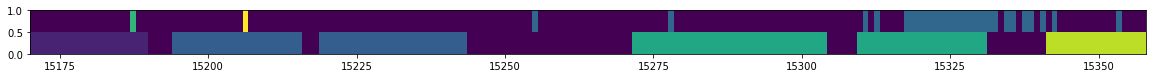

In [4]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import SeqIO
from Bio.Seq import Seq

import numpy as np
import matplotlib.pyplot as plt

consensus = []

# Range for creating plotting colors
range1 = 10
range2 = 80
range3 = 800

nc_range = {
    "F3":0,
    "B3":0,
    "FIP":0,
    "rFIP":0,
    "BIP":0,
    "rBIP":0
}

range_variation = []
plocation = []
primers={
    "F3":"",
    "B3":"",
    "FIP":"",
    "rFIP":"",
    "BIP":"",
    "rBIP":""
}


print("________________ALIGNING PRIMERS_________________")
with open("consensusSeq.txt", 'r') as infile:
    for record in SeqIO.parse(infile, "fasta"):
        consensus = str(record.seq).upper()
    with open("primers.txt", 'r') as primersIO:
            for primersIO in SeqIO.parse(primersIO, "fasta"):
                if "F3" in primersIO.id:
                    
                    alignments = pairwise2.align.localms(consensus, primersIO.seq,2,-1.5, -10,-2)
                    print("----------" + primersIO.id + "----------")
                    print(format_alignment(*alignments[0]))
                    nc_range["F3"] = format_alignment(*alignments[0]).split(" ")[0]
                    primers["F3"] = format_alignment(*alignments[0]).split(" ")[1].split("\n")[0]

                elif "B3" in primersIO.id:
                    
                    alignments = pairwise2.align.localms(consensus, primersIO.seq.reverse_complement(),2,-1.5, -10,-2)
                    print("----------" + primersIO.id + "----------")
                    print(format_alignment(*alignments[0]))
                    nc_range["B3"] = format_alignment(*alignments[0]).split(" ")[0]
                    primers["B3"] = format_alignment(*alignments[0]).split(" ")[1].split("\n")[0]

                elif "FIP" in primersIO.id:
                    
                    alignments = pairwise2.align.localms(consensus, primersIO.seq,2,-1.5, -10,-2)
                    print("----------" + primersIO.id + "----------")
                    print(format_alignment(*alignments[0]))
                    nc_range["FIP"] = format_alignment(*alignments[0]).split(" ")[0]
                    primers["FIP"] = format_alignment(*alignments[0]).split(" ")[1].split("\n")[0]
                    
                    alignments = pairwise2.align.localms(consensus, primersIO.seq.reverse_complement(),2,-1.5, -10,-2)
                    print("----------REVERSE COMPLEMENT OF " + primersIO.id + "----------")
                    print(format_alignment(*alignments[0]))
                    nc_range["rFIP"] = format_alignment(*alignments[0]).split(" ")[0]
                    primers["rFIP"] = format_alignment(*alignments[0]).split(" ")[1].split("\n")[0]

                elif "BIP" in primersIO.id:
                    
                    alignments = pairwise2.align.localms(consensus, primersIO.seq,2,-1.5, -10,-2)
                    print("----------REVERSE COMPLEMENT OF " + primersIO.id + "----------")
                    print(format_alignment(*alignments[0]))
                    nc_range["rBIP"] = format_alignment(*alignments[0]).split(" ")[0]
                    primers["rBIP"] = format_alignment(*alignments[0]).split(" ")[1].split("\n")[0]
                    
                    alignments = pairwise2.align.localms(consensus, primersIO.seq.reverse_complement(),2,-1.5, -10,-2)
                    print("----------" + primersIO.id + "----------")
                    print(format_alignment(*alignments[0]))
                    nc_range["BIP"] = format_alignment(*alignments[0]).split(" ")[0]
                    primers["BIP"] = format_alignment(*alignments[0]).split(" ")[1].split("\n")[0]
            
print("PRIMERS RANGE:" + str(nc_range["F3"]) + " - " + str(nc_range["B3"]))

print("________________COMPUTING VARIATION MATRIX_________________")

with open("Variation.txt", 'r') as infile:
    
    nc_variation = infile.readline()
    while not nc_range["F3"] in nc_variation:
        nc_variation = infile.readline()
        
    range_variation.append(float(nc_variation.split("\t")[1].split("\n")[0]))
    
    while not nc_range["B3"] in nc_variation:
        nc_variation = infile.readline()
        range_variation.append(float(nc_variation.split("\t")[1].split("\n")[0]))
    
    buff = []
    i = 0

    for n in range_variation:
            #calculate variation
            if n < range1:
                buff.append(0)
            elif n < range2:
                buff.append(0.33)
            elif n < range3:
                buff.append(0.66)
            else:
                buff.append(1)
            
            #Do this region have primers?
            if i < len(str(primers["F3"])): #F3
                plocation.append(0.1)
            elif i > (len(np.array(range_variation)) - len(str(primers["B3"]))):
                plocation.append(0.9)
            elif i > (int(nc_range["FIP"])-int(nc_range["F3"])) and i < ((int(nc_range["FIP"])-int(nc_range["F3"])) + len(str(primers["FIP"]))): 
                plocation.append(0.3)
            elif i > (int(nc_range["rBIP"])-int(nc_range["F3"])) and i < ((int(nc_range["rBIP"])-int(nc_range["F3"])) + len(str(primers["rBIP"]))): 
                plocation.append(0.6) 
            elif i < (int(nc_range["BIP"])-int(nc_range["F3"])) and i > ((int(nc_range["BIP"])-int(nc_range["F3"])) - len(str(primers["BIP"]))): 
                plocation.append(0.6)
            elif i < (int(nc_range["rFIP"])-int(nc_range["F3"])) and i > ((int(nc_range["rFIP"])-int(nc_range["F3"])) - len(str(primers["rFIP"]))): 
                plocation.append(0.3)
            else:
                plocation.append(0)
                
            i = i + 1
                
    range_variation = buff
    
    rv = np.array([range_variation])
    rv = np.vstack((rv, np.array([plocation])))

    fig, ax = plt.subplots(figsize=(20, 0.8))
    im = ax.imshow(rv,aspect='auto',extent=[int(nc_range["F3"]),int(nc_range["B3"]),0,1])
    
    
    plt.show()